## Logistic Regression

Logistic regression is an estimate of a logit function. Logit function is simply a log of odds in favor of the event. This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function. Here is how the logit function looks like:
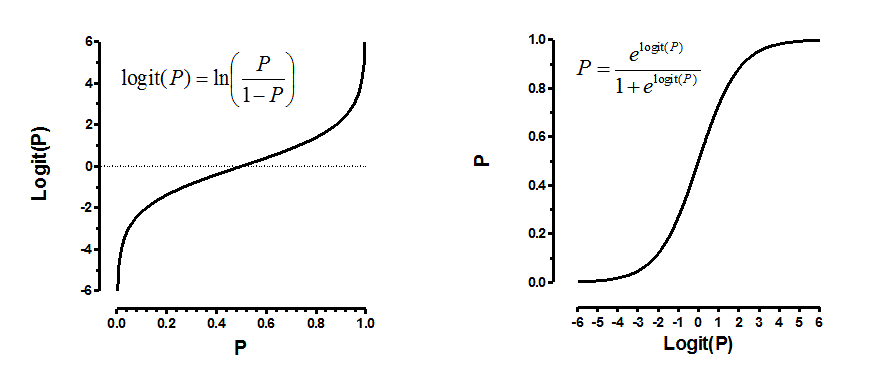

## importing libraries

In [11]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
digits = load_digits() # To load my training datasets

In [12]:
# to see what training sets contain
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

#### To see some element of data and images

In [28]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [35]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [13]:
print("Image Data Shape", digits.data.shape)
print("Image Target Shape", digits.target.shape)

Image Data Shape (1797, 64)
Image Target Shape (1797,)


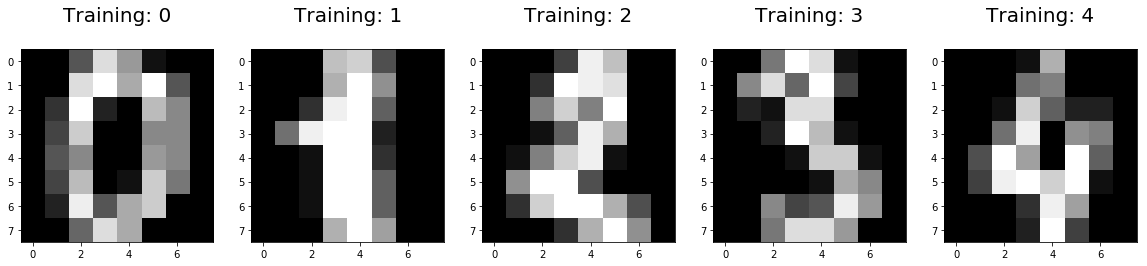

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

In [36]:
# to understand our image we get the target
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [15]:
# Training our model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.30, random_state=2)

In [16]:
print(X_train.shape, y_train.shape)

(1257, 64) (1257,)


In [17]:
print(X_test.shape, y_test.shape)

(540, 64) (540,)


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logisticreg = LogisticRegression()
logisticreg.fit(X_train, y_train)

C:\Users\SHEHU IBRAHIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SHEHU IBRAHIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
print(logisticreg.predict(X_test[0].reshape(1,-1)))

[4]


In [21]:
logisticreg.predict(X_test[0:10])

array([4, 0, 9, 1, 9, 7, 1, 5, 1, 6])

In [22]:
predictions = logisticreg.predict(X_test)

In [23]:
score = logisticreg.score(X_test, y_test)
print("{:.4f}".format(score))

0.9444


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics # using confusion matrix to check our model

In [25]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[54  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  1  0  0  0  0  3  1]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 56  0  2  0  2  1  1]
 [ 0  2  0  0 49  0  0  0  0  2]
 [ 0  0  0  0  0 56  0  1  0  2]
 [ 0  0  0  0  0  0 55  0  1  0]
 [ 0  0  0  0  0  0  0 54  1  0]
 [ 0  5  0  1  0  0  0  0 41  0]
 [ 0  0  0  0  0  1  0  0  3 40]]


Text(0.5, 1.0, 'Accuracy Score: 0.9444444444444444')

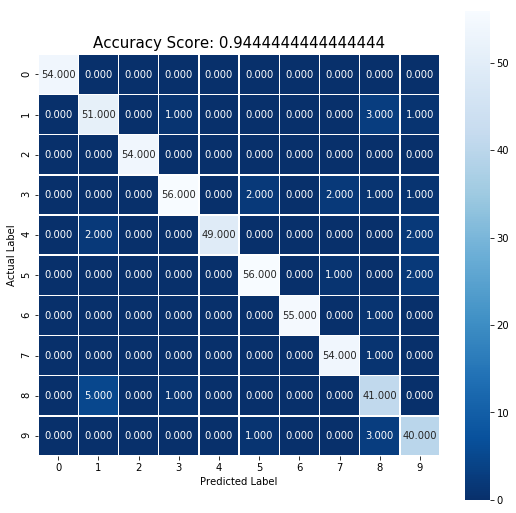

In [26]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", square=True, linewidth=.5, cmap = 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = ('Accuracy Score: {}'.format(score))
plt.title(all_sample_title, size=15)

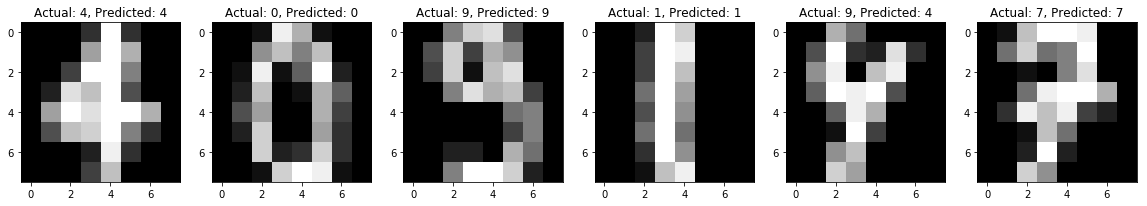

In [27]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict==actual:
        classifiedIndex.append(index)
        index +=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:6]):
    plt.subplot(1,6, plotIndex +1)
    plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap = plt.cm.gray)
    plt.title('Actual: {}, Predicted: {}'.format(predictions[wrong], y_test[wrong], fontsize=20))